In [1]:
# project: p10
# submitter-netid: yankov
# partner-netid: Tryoung2

In [2]:
#q1
%matplotlib inline
import requests
import pandas as pd
from pandas import DataFrame, Series
import json
URL = "https://tyler.caraza-harter.com/cs301/spring19/data/countries.json"
read =pd.read_json(URL)
countries = read
total = 0
for row in read['area']:
    total += row
total



127493303

In [3]:
#q2
import requests
get_url = requests.get("https://tyler.caraza-harter.com/cs301/spring19/data/capitals/manifest.txt").text
reader = get_url.split("\n")
reader[0]


'Brazil_Peru.json'

In [4]:
#q3
from requests import get
base_url = "https://tyler.caraza-harter.com/cs301/spring19/data/"
capital_url = base_url + "capitals/"
country1 = 'Brazil_Peru.json'
country2= 'ElSalvador_SaintHelena.json'
country3='Ghana_Belize.json'
country4='Palau_Nigeria.json'
country5='Portugal_Somalia.json'
country6='Seychelles_Cuba.json'
country7='Slovenia_Estonia.json'
country8='Tanzania_Swaziland.json'
country9='Vanuatu_Tajikistan.json'
list_of_dicts1 = get(capital_url + country1).json()
list_of_dicts2=get(capital_url + country2).json()
list_of_dicts3=get(capital_url + country3).json()
list_of_dicts4=get(capital_url + country4).json()
list_of_dicts5=get(capital_url + country5).json()
list_of_dicts6=get(capital_url + country6).json()
list_of_dicts7=get(capital_url + country7).json()
list_of_dicts8=get(capital_url + country8).json()
list_of_dicts9=get(capital_url + country9).json()
capital_rows=list_of_dicts1+list_of_dicts2+list_of_dicts3+list_of_dicts4+list_of_dicts5+list_of_dicts6+list_of_dicts7+list_of_dicts8+list_of_dicts9
capital_rows

[{'capital': 'Brasilia',
  'country': 'Brazil',
  'latitude': -15.783333333333333,
  'longitude': -47.916667},
 {'capital': 'Nouakchott',
  'country': 'Mauritania',
  'latitude': 18.066666666666666,
  'longitude': -15.966667000000001},
 {'capital': 'Bern',
  'country': 'Switzerland',
  'latitude': 46.91666666666666,
  'longitude': 7.466667},
 {'capital': 'Zagreb',
  'country': 'Croatia',
  'latitude': 45.8,
  'longitude': 16.0},
 {'capital': 'Cairo',
  'country': 'Egypt',
  'latitude': 30.05,
  'longitude': 31.25},
 {'capital': 'Sanaa',
  'country': 'Yemen',
  'latitude': 15.35,
  'longitude': 44.2},
 {'capital': 'Helsinki',
  'country': 'Finland',
  'latitude': 60.16666666666666,
  'longitude': 24.933332999999998},
 {'capital': 'Addis Ababa',
  'country': 'Ethiopia',
  'latitude': 9.033333333333333,
  'longitude': 38.7},
 {'capital': 'Prague',
  'country': 'Czech Republic',
  'latitude': 50.08333333333334,
  'longitude': 14.466667000000001},
 {'capital': 'Maseru',
  'country': 'Lesoth

In [5]:
#q4
capitals = DataFrame(capital_rows)
x1 = capitals.loc[capitals['country'] == "Bermuda"]
capital = list(x1['capital']).pop()
capital


'Hamilton'

In [6]:
#q5
info = capitals.loc[capitals['capital']== 'Maputo']
cntry = list(info['country']).pop()
cntry

'Mozambique'

In [7]:
#q6
south = capitals.sort_values(['latitude'])
south2 = south[:5]
answer = list(south2['country'])
answer


    

['New Zealand', 'Australia', 'Uruguay', 'Argentina', 'Chile']

In [8]:
#q7
north = capitals.sort_values(['latitude'], ascending = False)
north2 = north[:3]
answer = list(north2['country'])
answer


['Iceland', 'Finland', 'Norway']

In [9]:
#q8
info = {"birth-rate":countries['birth-rate'], "death-rate":countries['death-rate']}
info_df = DataFrame(info)
info_df.describe()

,birth-rate,death-rate
count,175.000000,175.000000
mean,22.536114,9.654971
std,11.287090,5.187216
min,8.250000,2.410000
25%,12.635000,6.075000
50%,20.340000,8.230000
75%,30.200000,11.965000
max,50.730000,29.740000


In [10]:
#q9
info = {"literacy":countries["literacy"], "phones":countries["phones"]}
info_df = DataFrame(info)
lit = info_df['literacy'].str.replace(",",".")
pho = info_df['phones'].str.replace(",", ".")
info2={"literacy": lit, "phones":pho}
info_df2 = DataFrame(info2)
info_df2 = info_df2.astype(float)
info_df2.describe()

,literacy,phones
count,175.000000,175.000000
mean,82.182286,214.621143
std,20.086897,218.613971
min,17.600000,1.300000
25%,69.950000,31.300000
50%,92.000000,140.100000
75%,98.000000,329.700000
max,100.000000,1035.600000


In [11]:
#q10
landlock = countries.sort_values(['coastline'])
landlock0 = landlock.loc[landlock['coastline']==0]
landlockeuro = landlock0.loc[landlock0['continent']=='Europe']
largest = landlockeuro.sort_values(['area'])
largest[-1:]
answer = list(largest['country']).pop()
answer

'Belarus'

In [12]:
#q11
landlock = countries.sort_values(['coastline'])
landlock0 = landlock.loc[landlock['coastline']==0]
landlockeuro = landlock0.loc[landlock0['continent']=='Africa']
largest = landlockeuro.sort_values(['area'])
largest[-1:]
answer = list(largest['country']).pop()
answer

'Chad'

In [13]:
#q12
landlock = countries.sort_values(['coastline'])
landlock0 = landlock.loc[landlock['coastline']==0]
landlockeuro = landlock0.loc[landlock0['continent']=='South America']
largest = landlockeuro.sort_values(['area'])
largest[-1:]
answer = list(largest['country']).pop()
answer

'Bolivia'

In [14]:
#q13
#code copied from https://gist.github.com/rochacbruno/2883505
import math

def distance(lat1, lon1, lat2, lon2):
 
    radius = 3956 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
     * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d
distance(43.070231,-89.411893,43.074645,-89.384113)

1.4338994920734274

In [15]:
#q14
info = capitals.loc[capitals['country']== 'India']
lat1 = list(info['latitude']).pop()
lon1 = list(info['longitude']).pop()
info2 = capitals.loc[capitals['country']== 'Brazil']
lat2 = list(info2['latitude']).pop()
lon2 = list(info2['longitude']).pop()
distance(lat1, lon1, lat2, lon2)

8840.574141306945

In [16]:
#q15
count1 = capitals.loc[capitals['country']=='Chile']
count11 = list(count1['country']).pop()
count2 = capitals.loc[capitals['country']=='Guyana']
count22 = list(count2['country']).pop()
count3 = capitals.loc[capitals['country']=='Colombia']
count33 = list(count3['country']).pop()
indices = columns = [count11, count22, count33]
df = DataFrame(index = indices, columns = columns)
lat1 = list(count1['latitude']).pop()
lon1 = list(count1['longitude']).pop()
lat2 = list(count2['latitude']).pop()
lon2 = list(count2['longitude']).pop()
lat3 = list(count3['latitude']).pop()
lon3 = list(count3['longitude']).pop()
df[count11][count22] = df[count22][count11] = distance(lat1, lon1, lat2, lon2)
df[count11][count33] = df[count33][count11] = distance(lat1, lon1, lat3, lon3)
df[count33][count22] = df[count22][count33] = distance(lat2, lon2, lat3, lon3)
df

,Chile,Guyana,Colombia
Chile,NaN,2897.55,2636.64
Guyana,2897.55,NaN,1105.07
Colombia,2636.64,1105.07,NaN


In [17]:
from math import radians, cos, sin, asin, sqrt
#code below from https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points

def haversine(lat1, lon1, lat2, lon2):

      R = 3956 # this is in miles.  For Earth radius in kilometers use 6372.8 km

      dLat = radians(lat2 - lat1)
      dLon = radians(lon2 - lon1)
      lat1 = radians(lat1)
      lat2 = radians(lat2)

      a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
      c = 2*asin(sqrt(a))

      return R * c

In [18]:
#q16
import numpy as np
i1 = countries.sort_values(by=['country'])
j1 = capitals.sort_values(by=['country'])
conts = i1.set_index(['country'])
lats = j1.set_index(['country'])
table1 = {'latitude':lats['latitude'], 'longitude':lats['longitude'], 'continent':conts['continent'],}
df_4 = DataFrame(table1)

df_5 = df_4[df_4['continent'] == 'South America']
table2 = {'latitude':df_5['latitude'], 'longitude':df_5['longitude'], 'country':df_5.index.values,'index':(range(len(df_5['latitude'].tolist())))}
df_6 = DataFrame(table2)
df_6 = df_6.set_index('index')
latlist = (df_6['latitude'].tolist())
longlist = (df_6['longitude'].tolist())
countrylist = (df_6['country'].tolist())
ans = 0
count = 0
count2 = 0
ans = 0
row = []
values = {}
while count < 12:
    while count2 < 12: 
        ans = haversine(latlist[count], longlist[count], latlist[count2], longlist[count2])
        if ans == 0.0:
            values[countrylist[count2]] = np.nan
        if ans != 0.0:
            values[countrylist[count2]] = ans
        count2 += 1
    row.append(values)
    values = {}
    count += 1
    count2 = 0
df_7 = DataFrame(row)
df_8 = df_7.set_index(Series(countrylist))
df_8

,Argentina,Bolivia,Brazil,Chile,Colombia,Ecuador,Guyana,Paraguay,Peru,Suriname,Uruguay,Venezuela
Argentina,NaN,1379.455702,1459.139733,690.784168,2885.355610,2696.149591,2857.520462,646.036442,1936.465790,2799.886429,143.069943,3157.624051
Bolivia,1379.455702,NaN,1342.297074,1180.741903,1512.119255,1326.758656,1747.772670,906.799256,669.926372,1778.772975,1467.253638,1865.131181
Brazil,1459.139733,1342.297074,NaN,1869.737031,2275.516286,2344.584922,1709.071018,908.185709,1967.770515,1572.674233,1412.096335,2228.690680
Chile,690.784168,1180.741903,1869.737031,NaN,2636.644599,2350.207788,2897.553095,963.635535,1531.480189,2895.810776,833.403262,3043.657689
Colombia,2885.355610,1512.119255,2275.516286,2636.644599,NaN,451.004119,1105.066312,2337.615967,1167.505359,1303.405134,2962.230943,639.361118
Ecuador,2696.149591,1326.758656,2344.584922,2350.207788,451.004119,NaN,1483.193753,2218.650964,823.054491,1661.699022,2791.196721,1088.064118
Guyana,2857.520462,1747.772670,1709.071018,2897.553095,1105.066312,1483.193753,NaN,2214.288286,1837.860149,215.336336,2878.638295,646.969843
Paraguay,646.036442,906.799256,908.185709,963.635535,2337.615967,2218.650964,2214.288286,NaN,1558.635236,2153.855447,667.699386,2544.799572
Peru,1936.465790,669.926372,1967.770515,1531.480189,1167.505359,823.054491,1837.860149,1558.635236,NaN,1944.750017,2046.571589,1705.418003
Suriname,2799.886429,1778.772975,1572.674233,2895.810776,1303.405134,1661.699022,215.336336,2153.855447,1944.750017,NaN,2809.744412,861.456786


In [19]:
#q17
df_8['mean'] = df_8.mean(axis=1)
mean_distance = df_8['mean']
sorted_mean = mean_distance.sort_values(ascending = True)
listed_means = sorted_mean.index
listed_means[0]

'Bolivia'

In [20]:
#q18
listed_means[11]

'Uruguay'

In [21]:
#q19
closest_dist = df_8.min()
clostest_to = df_8.idxmin()
table_5 = {'nearest':clostest_to, 'distance':closest_dist}
df_9 = DataFrame(table_5)
df_9

,nearest,distance
Argentina,Uruguay,143.069943
Bolivia,Peru,669.926372
Brazil,Paraguay,908.185709
Chile,Argentina,690.784168
Colombia,Ecuador,451.004119
Ecuador,Colombia,451.004119
Guyana,Suriname,215.336336
Paraguay,Argentina,646.036442
Peru,Bolivia,669.926372
Suriname,Guyana,215.336336


In [22]:
#q20
furthest_dist = df_8.max()
furthest_to = df_8.idxmax()
table_6 = {'furthest':furthest_to, 'distance':furthest_dist}
df_10 = DataFrame(table_6)
df_10

,furthest,distance
Argentina,Venezuela,3157.624051
Bolivia,Venezuela,1865.131181
Brazil,Ecuador,2344.584922
Chile,Venezuela,3043.657689
Colombia,Uruguay,2962.230943
Ecuador,Uruguay,2791.196721
Guyana,Chile,2897.553095
Paraguay,Venezuela,2544.799572
Peru,Uruguay,2046.571589
Suriname,Chile,2895.810776


In [23]:
#q21
import sqlite3
conn = sqlite3.connect('countries')
countries.to_sql("countries", conn, if_exists="replace", index=False)
countries1 = pd.read_sql('''SELECT continent, COUNT(country) AS "number of countries" FROM countries GROUP BY continent
                        ORDER BY "number of countries" ASC''', conn)
conn.close()
countries1


,continent,number of countries
0,Australia,12
1,South America,12
2,North America,24
3,Asia,38
4,Europe,41
5,Africa,48


Text(0, 0.5, 'number of countries')

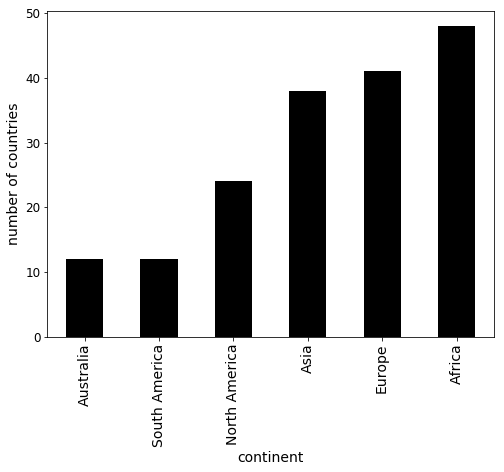

In [24]:
#q22
import matplotlib.pyplot as plt
ax = countries1.plot(kind='bar',figsize=(8,6),legend=False, fontsize=12, color='black')
LABELS = [countries1['continent']]
ax.set_xlabel("continent",fontsize=14)
ax.set_xticklabels(('Australia','South America','North America','Asia','Europe','Africa'),fontsize=14)
ax.set_ylabel("number of countries",fontsize=14)



In [25]:
#q23
conn = sqlite3.connect('ans')
countries.to_sql("countries_table", conn, if_exists="replace", index=False)
countries2 = pd.read_sql('''SELECT continent, (Sum(population))/1000000.0 AS pop FROM countries_table GROUP BY continent ORDER BY pop DESC''', conn)
conn.close()
ans=countries2.rename(columns={'pop':'total population (million)'}, inplace=True)
countries2

,continent,total population (million)
0,Asia,3739.902863
1,Africa,824.954038
2,Europe,792.053486
3,North America,515.041558
4,South America,375.441666
5,Australia,32.163025


Text(0, 0.5, 'total population (million)')

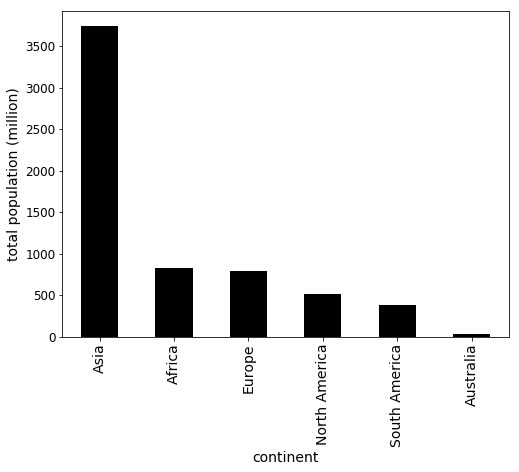

In [26]:
#q24
ax = countries2.plot(kind='bar',figsize=(8,6),legend=False, fontsize=12, color='black')
LABELS = [countries1['continent']]
ax.set_xlabel("continent",fontsize=14)
ax.set_xticklabels(countries2['continent'],fontsize=14)
ax.set_ylabel("total population (million)",fontsize=14)



In [27]:
#q25
aus = countries.loc[countries['continent']== "Australia"]
aus_pop = aus.sort_values(['population'], ascending = False)
info = {"country": aus_pop["country"], "population": aus_pop['population']}
aus_pop_df = DataFrame(info)
aus_pop_df.index = range(len(aus_pop_df))
aus_pop_df

,country,population
0,Australia,20264082
1,Papua New Guinea,5670544
2,New Zealand,4076140
3,Fiji,905949
4,French Polynesia,274578
5,New Caledonia,219246
6,Vanuatu,208869
7,Samoa,176908
8,Guam,171019
9,Tonga,114689


In [28]:
#q26
gdp = countries.sort_values(['gdp-per-capita'], ascending = False)
real_GDP = (gdp['population'] * gdp['gdp-per-capita'])/1000000000
info = {'country': gdp['country'], 'real GDP (billion)': real_GDP}
gdp_df = DataFrame(info)
gdp_df2 = gdp_df.sort_values(['real GDP (billion)'], ascending = False)
gdp_df2.index=range(len(gdp_df2))
gdp_df2[:10]


,country,real GDP (billion)
0,United States,11281.191327
1,China,6569.868565
2,Japan,3594.473830
3,India,3176.520785
4,Germany,2274.855452
5,France,1680.181354
6,United Kingdom,1678.873538
7,Italy,1552.164690
8,Brazil,1429.394525
9,Russia,1271.752506


Text(0, 0.5, '')

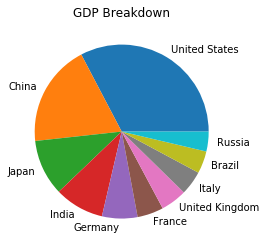

In [29]:
#q27
gdp_df3=gdp_df2[:10]
gdp_df4=gdp_df3['real GDP (billion)']
ax=gdp_df4.plot.pie(title='GDP Breakdown',label=None,labels=['United States','China','Japan','India','Germany','France','United Kingdom','Italy','Brazil','Russia'])
ax.set_ylabel('')

In [30]:
#q28
countries['diff']=countries['birth-rate']-countries['death-rate']
countries['diff']
gap=countries.sort_values(['diff'], ascending = False)
gap
info = {'country': gap['country'], 'birth-rate': gap['birth-rate'], 'death-rate': gap['death-rate']}
ans_gap=DataFrame(info)
ans=ans_gap[:10]
biggest_gap=ans.reset_index(drop=True)
biggest_gap

,country,birth-rate,death-rate
0,Uganda,47.35,12.24
1,Yemen,42.89,8.30
2,Mali,49.82,16.89
3,Oman,36.24,3.81
4,Madagascar,41.41,11.11
5,Burkina Faso,45.62,15.60
6,Niger,50.73,20.91
7,Chad,45.73,16.38
8,Mauritania,40.99,12.16
9,Burundi,42.22,13.46


Text(0.5, 0, 'rate')

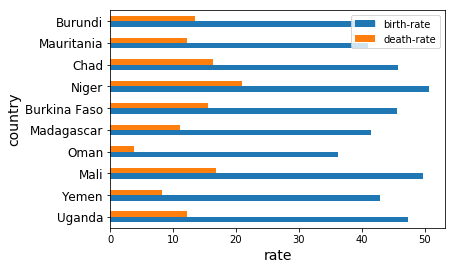

In [31]:
#q29
top=biggest_gap['country']
index=top
topx=biggest_gap.plot.barh()
topx.set_yticklabels(index,fontsize=12)
topx.set_ylabel("country",fontsize=14)
topx.set_xlabel("rate",fontsize=14)

Text(0.5, 0, 'birth-rate')

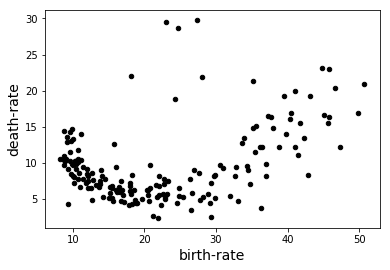

In [32]:
#q30
Q30=ans_gap.reset_index(drop=False)
#ax=plt.scatter(Q30['birth-rate'], Q30['death-rate'],c='black')
ax = Q30.plot(kind='scatter', x='birth-rate', y='death-rate',c='black')
ax.set_ylabel('death-rate',fontsize=14)
ax.set_xlabel('birth-rate',fontsize=14)

In [33]:
#q31
info = Q30.loc[Q30['death-rate'] >= 17]
info2 = info.loc[info['birth-rate'] <=30]
info3 = info2.sort_values(['birth-rate'], ascending = True)
info4 = info3.reset_index(drop=True)
info4

,index,country,birth-rate,death-rate
0,99,South Africa,18.20,22.00
1,33,Botswana,23.08,29.50
2,151,Namibia,24.32,18.86
3,63,Lesotho,24.75,28.71
4,25,Swaziland,27.41,29.74
5,135,Zimbabwe,28.01,21.84


In [34]:
#q32
correlation = Q30.corr()
answer = list(correlation['birth-rate']).pop()
answer

0.40037782919521714

Text(0.5, 0, 'birth-rate')

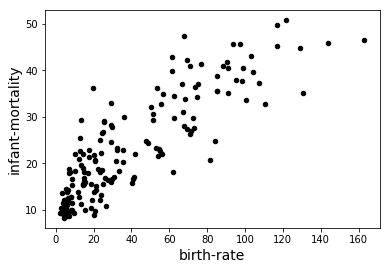

In [35]:
#q33
countries['diff']=countries['birth-rate']-countries['infant-mortality']
countries['diff']
gap=countries.sort_values(['diff'], ascending = False)
gap
info = {'country': gap['country'], 'birth-rate': gap['birth-rate'], 'infant-mortality': gap['infant-mortality']}
ans_gap=DataFrame(info)
ans_gap
Q33=ans_gap.reset_index(drop=False)
ax = Q33.plot(kind='scatter', x='infant-mortality', y='birth-rate',c='black')
ax.set_ylabel('infant-mortality',fontsize=14)
ax.set_xlabel('birth-rate',fontsize=14)

In [36]:
#q34
correlation = Q33.corr()
answer = list(correlation['birth-rate']).pop()
answer

0.868726567803142

Text(0.5, 0, 'gdp-per-capita')

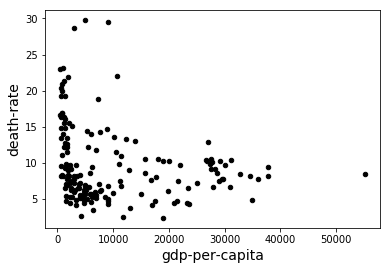

In [37]:
#q35
countries['diff']=countries['gdp-per-capita']-countries['death-rate']
countries['diff']
gap=countries.sort_values(['diff'], ascending = False)
gap
info = {'country': gap['country'], 'gdp-per-capita': gap['gdp-per-capita'], 'death-rate': gap['death-rate']}
ans_gap=DataFrame(info)
Q35=ans_gap.reset_index(drop=False)
ax = Q35.plot(kind='scatter', x='gdp-per-capita', y='death-rate',c='black')
ax.set_ylabel('death-rate',fontsize=14)
ax.set_xlabel('gdp-per-capita',fontsize=14)

In [38]:
#q36
correlation = Q35.corr()
answer = list(correlation['gdp-per-capita']).pop()
answer

-0.20995846867456763

Text(0.5, 0, 'gdp-per-capita')

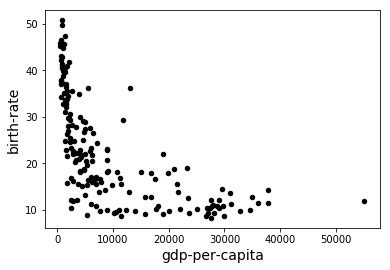

In [39]:
#q37
countries['diff']=countries['gdp-per-capita']-countries['birth-rate']
countries['diff']
gap=countries.sort_values(['diff'], ascending = False)
gap
info = {'country': gap['country'], 'gdp-per-capita': gap['gdp-per-capita'], 'birth-rate': gap['birth-rate']}
ans_gap=DataFrame(info)
Q37=ans_gap.reset_index(drop=False)
ax = Q37.plot(kind='scatter', x='gdp-per-capita', y='birth-rate',c='black')
ax.set_ylabel('birth-rate',fontsize=14)
ax.set_xlabel('gdp-per-capita',fontsize=14)

Text(0.5, 0, 'gdp-per-capita')

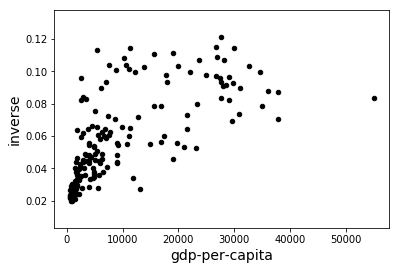

In [40]:
#q38
inverse = 1/countries['birth-rate']
countries['diff']=countries['gdp-per-capita']-inverse
countries['diff']
gap=countries.sort_values(['diff'], ascending = False)
gap
info = {'country': gap['country'], 'gdp-per-capita': gap['gdp-per-capita'], 'inverse': 1/gap['birth-rate']}
ans_gap2=DataFrame(info)
ans_gap2
Q38=ans_gap2.reset_index(drop=False)
ax = Q38.plot(kind='scatter', x='gdp-per-capita', y='inverse',c='black')
ax.set_ylabel('inverse',fontsize=14)
ax.set_xlabel('gdp-per-capita',fontsize=14)

In [41]:
#q39
import numpy as np


ans_gap2["1"] = 1

res = np.linalg.lstsq(ans_gap2[["gdp-per-capita", "1"]], ans_gap2["inverse"], rcond=None)

coefficients = res[0] # coefficients is (m,n:
tuple1 = coefficients[0] # slope
tuple2 = coefficients[1]
tuple1,tuple2

(1.842239440049634e-06, 0.03903504364953539)

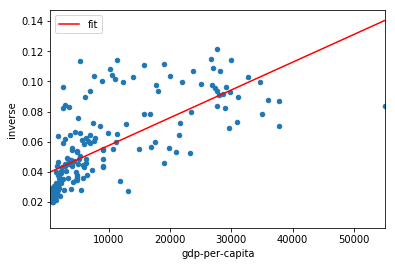

In [42]:
#q40
import numpy as np


ans_gap2["1"] = 1

res = np.linalg.lstsq(ans_gap2[["gdp-per-capita", "1"]], ans_gap2["inverse"], rcond=None)

# res is a tuple: (COEFFICIENTS, VALUE, VALUE, VALUE)
coefficients = res[0] # coefficients is (m,n:
slope = coefficients[0] # slope
intercept = coefficients[1] # intercept
ax = ans_gap2.plot.scatter(x='gdp-per-capita', y='inverse')

ans_gap2["fit"] = ans_gap2["gdp-per-capita"] * slope + intercept
ans_gap2.plot.line(x='gdp-per-capita', y='fit', c='red', ax=ax)
